In [44]:
#data
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
from sklearn import datasets

#split
from sklearn.model_selection import train_test_split

#scale
from sklearn.preprocessing import StandardScaler

#cross validation
from sklearn.model_selection import GridSearchCV

#machine learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [2]:
#load data
data = datasets.load_wine()

In [3]:
df, y = pd.DataFrame(data.data, columns = data.feature_names, dtype = "float16"), data.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.226562,1.709961,2.429688,15.601562,127.0,2.800781,3.060547,0.280029,2.289062,5.640625,1.040039,3.919922,1065.0
1,13.203125,1.780273,2.140625,11.203125,100.0,2.650391,2.759766,0.260010,1.280273,4.378906,1.049805,3.400391,1050.0
2,13.156250,2.359375,2.669922,18.593750,101.0,2.800781,3.240234,0.300049,2.810547,5.679688,1.030273,3.169922,1185.0
3,14.367188,1.950195,2.500000,16.796875,113.0,3.849609,3.490234,0.239990,2.179688,7.800781,0.859863,3.449219,1480.0
4,13.242188,2.589844,2.869141,21.000000,118.0,2.800781,2.689453,0.389893,1.820312,4.320312,1.040039,2.929688,735.0


Seems like we might need to stadarize some variables but we begin by taking a look at the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float16
 1   malic_acid                    178 non-null    float16
 2   ash                           178 non-null    float16
 3   alcalinity_of_ash             178 non-null    float16
 4   magnesium                     178 non-null    float16
 5   total_phenols                 178 non-null    float16
 6   flavanoids                    178 non-null    float16
 7   nonflavanoid_phenols          178 non-null    float16
 8   proanthocyanins               178 non-null    float16
 9   color_intensity               178 non-null    float16
 10  hue                           178 non-null    float16
 11  od280/od315_of_diluted_wines  178 non-null    float16
 12  proline                       178 non-null    float16
dtypes: fl

There are no missing values so no need to worry about that.

In [6]:
#summary
df.describe(include = [np.number], percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,max
alcohol,178.0,13.000000,0.812012,11.031250,11.442344,11.932813,12.361328,13.046875,13.677734,14.101562,14.828125
malic_acid,178.0,2.335938,1.117188,0.740234,0.897656,1.247070,1.602295,1.865234,3.082031,3.983398,5.800781
ash,178.0,2.367188,0.274414,1.360352,1.700195,2.000000,2.210938,2.359375,2.558105,2.699219,3.230469
alcalinity_of_ash,178.0,19.500000,3.339844,10.601562,11.353516,16.000000,17.203125,19.500000,21.500000,24.000000,30.000000
magnesium,178.0,99.750000,14.281250,70.000000,78.000000,85.000000,88.000000,98.000000,107.000000,118.000000,162.000000
total_phenols,178.0,2.294922,0.625977,0.979980,1.138711,1.471387,1.742676,2.354492,2.800781,3.043555,3.880859
flavanoids,178.0,2.029297,0.999023,0.340088,0.469971,0.606934,1.205078,2.135742,2.875488,3.233398,5.078125
nonflavanoid_phenols,178.0,0.362061,0.124390,0.130005,0.140015,0.216968,0.270020,0.340088,0.437439,0.529785,0.660156
proanthocyanins,178.0,1.590820,0.572266,0.409912,0.419922,0.853857,1.250000,1.554688,1.950195,2.304297,3.580078
color_intensity,178.0,5.058594,2.318359,1.280273,1.863555,2.549219,3.220703,4.689453,6.199219,8.530469,13.000000


The max flavonoids is more than 10 times higher than the lowest, this seems a little bit weird.

In [7]:
df.sort_values("flavanoids", ascending=False).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
121,11.562500,2.050781,3.230469,28.500000,119.0,3.179688,5.078125,0.469971,1.870117,6.000000,0.930176,3.689453,465.0
18,14.187500,1.589844,2.480469,16.500000,108.0,3.300781,3.929688,0.320068,1.860352,8.703125,1.230469,2.820312,1680.0
98,12.367188,1.070312,2.099609,18.500000,88.0,3.519531,3.750000,0.239990,1.950195,4.500000,1.040039,2.769531,660.0
52,13.820312,1.750000,2.419922,14.000000,111.0,3.880859,3.740234,0.320068,1.870117,7.050781,1.009766,3.259766,1190.0
13,14.750000,1.730469,2.390625,11.398438,91.0,3.099609,3.689453,0.429932,2.810547,5.398438,1.250000,2.730469,1150.0


In [8]:
df.sort_values("flavanoids", ascending=False).tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
170,12.203125,3.029297,2.320312,19.0,96.0,1.250000,0.489990,0.399902,0.729980,5.500000,0.660156,1.830078,510.0
138,13.492188,3.589844,2.189453,19.5,88.0,1.620117,0.479980,0.580078,0.879883,5.699219,0.810059,1.820312,580.0
165,13.726562,4.359375,2.259766,22.5,88.0,1.280273,0.469971,0.520020,1.150391,6.621094,0.779785,1.750000,520.0
136,12.250000,4.718750,2.539062,21.0,89.0,1.379883,0.469971,0.529785,0.799805,3.849609,0.750000,1.269531,720.0
146,13.882812,5.039062,2.230469,20.0,80.0,0.979980,0.340088,0.399902,0.680176,4.898438,0.580078,1.330078,415.0


Nothing weird going on. Before doing aapplying any machine learning model is important to see if our target variable is skewed.

In [9]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


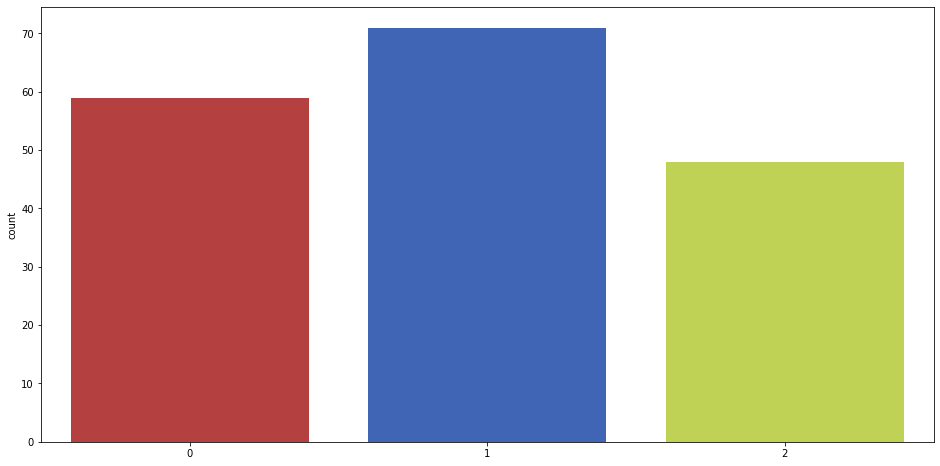

In [10]:
ax = sns.countplot(y, palette = ["#c72d2d", "#2d5ec7", "#cde740"])

ax.figure.set_size_inches(16, 8)
plt.show()

This seems fine so let's take a look at the data.

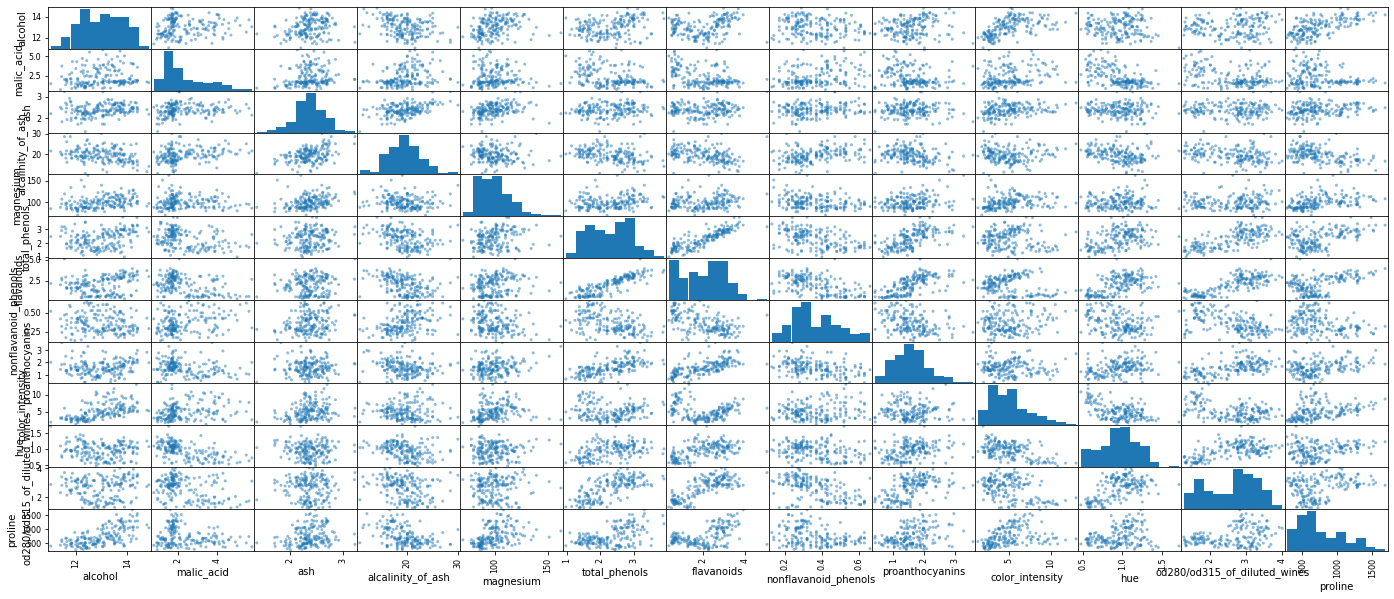

In [11]:
ax = pd.plotting.scatter_matrix(df, figsize = (24, 10))

plt.show()

"flavanoids"  nonflavaoid_phenols

I don't see any outliers from here so let's take a look at the correlations.

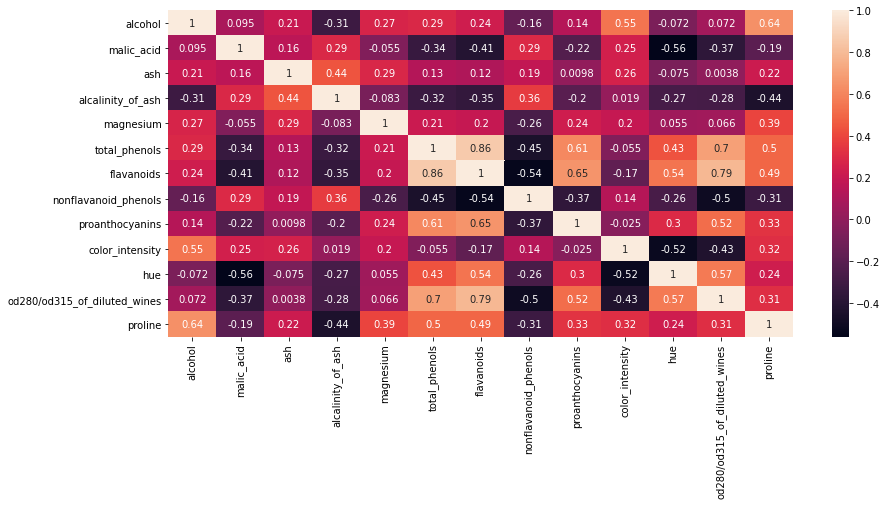

In [12]:
ax = sns.heatmap(df.corr(), annot = True)
ax.figure.set_size_inches(14, 6)
plt.show()

Nothing too crazy so let's take a closer look at some plots.

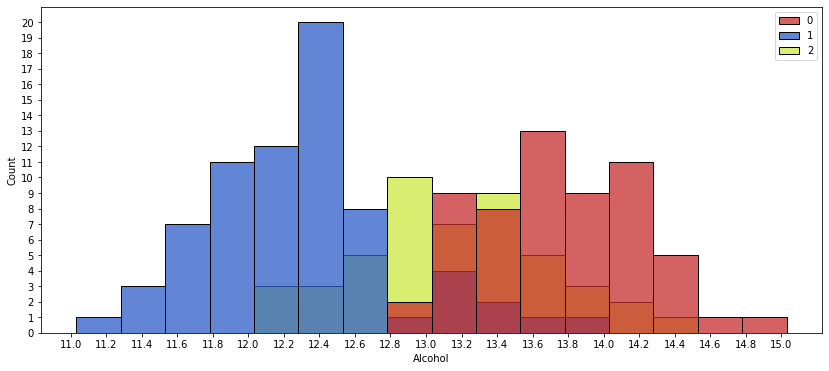

In [13]:
ax = sns.histplot(x = df["alcohol"], binwidth=0.25, hue = y, multiple = "fill",  common_bins = True,
                  palette = ["#c72d2d", "#2d5ec7", "#cde740"], cumulative = False)
ax.set_xticks(np.arange(11, 15.1, 0.2))
ax.set_yticks(np.arange(0, 21, 1))
ax.set(xlabel = "Alcohol", ylabel = "Count")
ax.figure.set_size_inches(14,6)
plt.show()

Blue ones have the lowest amount of alcohol while the red ones have the highest. 

Malic_acid seems highly skewed so let's check that.

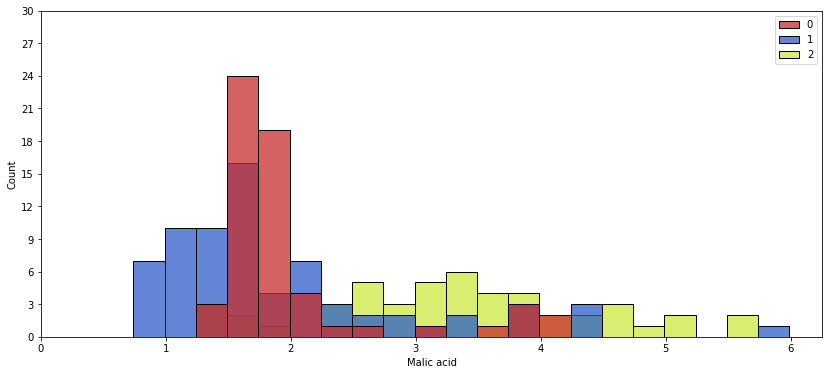

In [14]:
ax = sns.histplot(x = df["malic_acid"], binwidth = 0.25, common_bins=True, hue=y, multiple = "stack", 
                   palette = ["#c72d2d", "#2d5ec7", "#cde740"], cumulative=False)
ax.set_xticks(np.arange(0, 7, 1))
ax.set_yticks(np.arange(0, 31, 3))
ax.set(xlabel = "Malic acid", ylabel = "Count")
ax.figure.set_size_inches(14, 6)
plt.show()

In this variable there's not clear separation between the targets.

In [15]:
df.alcalinity_of_ash

0      15.601562
1      11.203125
2      18.593750
3      16.796875
4      21.000000
         ...    
173    20.500000
174    23.000000
175    20.000000
176    20.000000
177    24.500000
Name: alcalinity_of_ash, Length: 178, dtype: float16

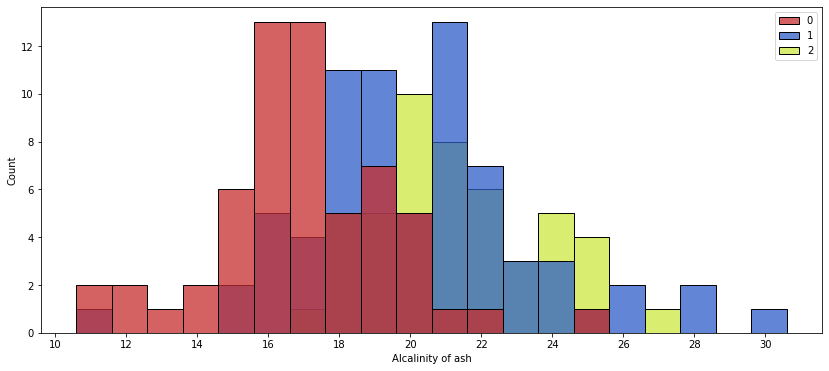

In [16]:
ax = sns.histplot(x = df["alcalinity_of_ash"], binwidth=1, common_bins=True, hue = y, multiple="stack",
                   palette = ["#c72d2d", "#2d5ec7", "#cde740"], cumulative = False)
ax.set_xticks(np.arange(10, 31, 2))
ax.set_yticks(np.arange(0, 13, 2))
ax.set(xlabel="Alcalinity of ash", ylabel="Count")
ax.figure.set_size_inches(14, 6)
plt.show()

Red have have loe alcalinity while yellow and blue have really similar values in this variable.

In [17]:
def scat(x, z,xticks, yticks, xlabel, ylabel, title, **kwargs):
  ax = sns.scatterplot(x=x, y=z, hue=y, palette = ["#c72d2d", "#2d5ec7", "#cde740"], **kwargs)
  ax.set_xticks(xticks)
  ax.set_yticks(yticks)
  ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
  ax.figure.set_size_inches(14, 6)
  plt.show()

Let's compare Alcohol and Malic Acid

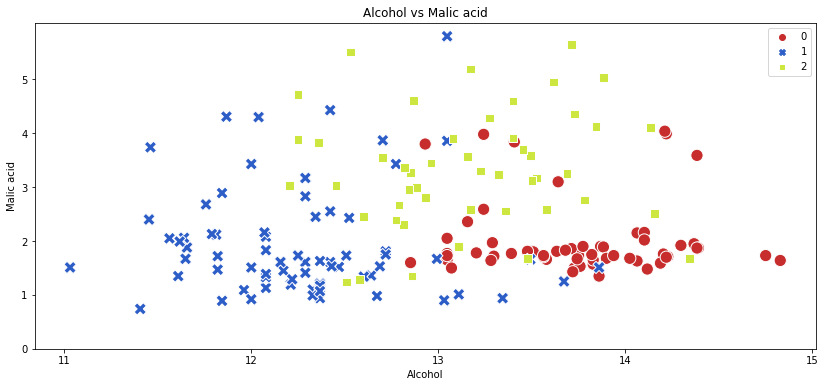

In [18]:
scat(x=df["alcohol"], z=df["malic_acid"], xticks=np.arange(11, 16, 1), yticks=np.arange(0, 6, 1), s = 150,
     xlabel="Alcohol", ylabel="Malic acid", title="Alcohol vs Malic acid", legend = "full", style = y)

Wines that belong to 1 have low alcohol and low malic acid, wines that belong to 2 have high alcohol and low malic acid, and wines that belong to 3 have high malic acid and middle alcohol. We would be able to get an ok decision boundary with some classification model. Let's compare other variables.

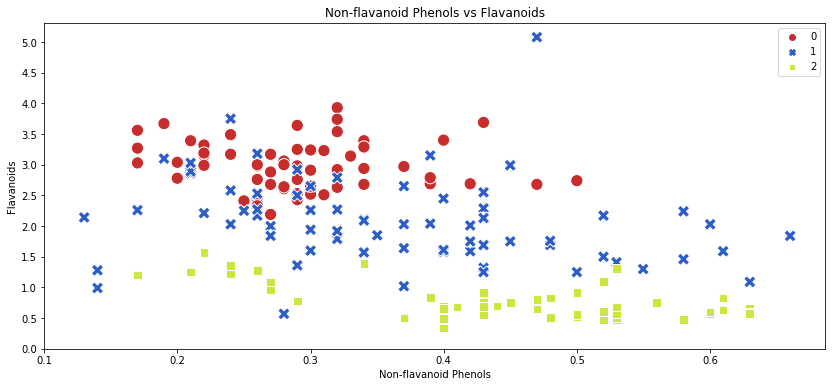

In [19]:
scat(x=df["nonflavanoid_phenols"], z=df["flavanoids"], xticks=np.arange(0.1, 0.7, 0.1), yticks=np.arange(0, 5.5, 0.5), s = 150, 
     xlabel="Non-flavanoid Phenols", ylabel = "Flavanoids", title = "Non-flavanoid Phenols vs Flavanoids", legend = "full", style = y)

Wine of type 0 has high flavanoids but mostly low non flavanoid phenols, wines of type 2 have low flavanoids and high non-flavanoid penols and type 1 wines are kinda messy. Just like the example before this one, we might get an ok decision boundary with a simmple classifier. This plot made me curious about the nonflavanoid phenols, let's take a closet look at that.

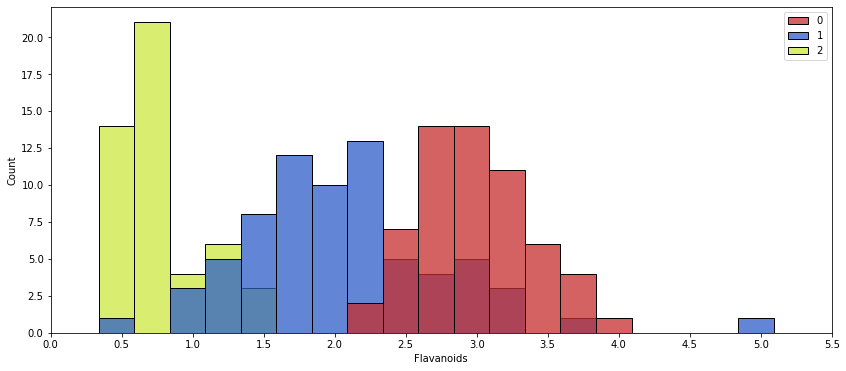

In [20]:
ax = sns.histplot(x=df["flavanoids"], binwidth=0.25, common_bins=True, multiple="stack", hue=y,
                  palette = ["#c72d2d", "#2d5ec7", "#cde740"], cumulative=False)
ax.figure.set_size_inches(14,6)
ax.set(xlabel="Flavanoids", ylabel = "Count")
ax.set_xticks(np.arange(0, 6, 0.5))
plt.show()

Just as we just saw, the different types of wine get confused with respect to this variable.

In [21]:
df.ash, df.proanthocyanins

(0      2.429688
 1      2.140625
 2      2.669922
 3      2.500000
 4      2.869141
          ...   
 173    2.449219
 174    2.480469
 175    2.259766
 176    2.369141
 177    2.740234
 Name: ash, Length: 178, dtype: float16, 0      2.289062
 1      1.280273
 2      2.810547
 3      2.179688
 4      1.820312
          ...   
 173    1.059570
 174    1.410156
 175    1.349609
 176    1.459961
 177    1.349609
 Name: proanthocyanins, Length: 178, dtype: float16)

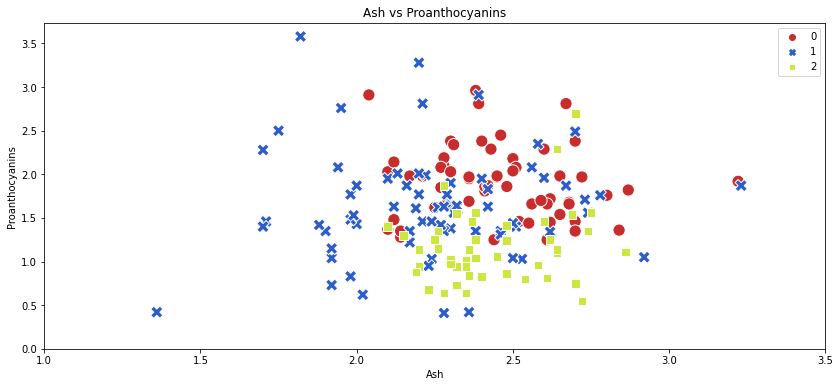

In [22]:
scat(x = df["ash"], z = df["proanthocyanins"], xticks=np.arange(1, 4, 0.5), yticks=np.arange(0, 4, 0.5), s=150,
     xlabel = "Ash", ylabel = "Proanthocyanins", title = "Ash vs Proanthocyanins", legend="full", style = y)

Proanthocyanus seems to be quite good to divide wines of type 0 and 2 but it's all over the place with type 1 wines. These variables seem to only work fo classify two types of wine.

Now let's do some machine learning. We begin by splitting the data. The dataset is small so i'll use crossvalidation so there's no need for a validation set.

In [23]:
#stratify split the data into 0.75 and 0,25
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size = 0.75, random_state =0, shuffle = True, stratify=y)

In [24]:
#scale data
stdsc = StandardScaler()

#fit and transform the training data, transform the training data
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


We begin with logistic regression

In [25]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()

#parameter grid
param_grid_lda = {"shrinkage":["auto", 0, 0.3, 0.6, 1], "solver":["lsqr"]}

#grid search
grid_search_lda = GridSearchCV(lda, param_grid_lda, cv = 10, scoring="accuracy")

#fit
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'shrinkage': ['auto', 0, 0.3, 0.6, 1],
                         'solver': ['lsqr']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best score and best parameters.

In [26]:
grid_search_lda.best_score_, grid_search_lda.best_params_

(0.9395604395604396, {'shrinkage': 0, 'solver': 'lsqr'})

Now some logistic regression

In [27]:
#Logistic regression
lr = LogisticRegression(n_jobs = -1, random_state=0, max_iter = 100)

#parameter grid
param_grid_lr = {"penalty":["l1", "l2", "elasticnet"], "C":[10**(-x) for x in range(0, 5)]}

#grid search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv = 10, scoring="accuracy", n_jobs = -1)

#fit
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best score and best parameters

In [28]:
grid_search_lr.best_score_, grid_search_lr.best_params_

(0.9258241758241759, {'C': 0.01, 'penalty': 'l2'})

Now a decision tree

In [29]:
#decision tree
dt_clf = DecisionTreeClassifier(random_state=0)

#parameter grid
param_grid_dt = {"criterion":["gini", "entropy"], "max_depth":[1,3,5,7], "max_features":[None, "sqrt"], 
                  "max_leaf_nodes":[1,3,5,7]}

#grid search
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, cv = 10, scoring="accuracy", n_jobs=-1)

#fiy
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                 

Best score and best parameters

In [30]:
grid_search_dt.best_score_, grid_search_dt.best_params_

(0.9780219780219781,
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': None,
  'max_leaf_nodes': 5})

This is quite good, let's see if we can do better with a random forest.

In [31]:
#random forest classifier
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)

#parameter grid
param_grid_rf = {"criterion":["gini", "entropy"], "n_estimators":[10 ,50, 100], "max_depth":[2,4,5], 
                 "max_features":["sqrt", "log2"], "max_leaf_nodes":[2,4,5]}

#grid search
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv = 10, scoring = "accuracy", n_jobs = -1)

#fit
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                    

Best score and best paremeter

In [32]:
grid_search_rf.best_score_, grid_search_rf.best_params_

(0.9780219780219781,
 {'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 'sqrt',
  'max_leaf_nodes': 4,
  'n_estimators': 100})

The same cv-error. Due to the small size of the dataset they're probably getting the same ones wrong. We were able to see in our exploratory data analysis that some variables were quite ok to separate the variables, i think this is the reason that a simple a tree has the same performance as a random forest.

In [33]:
#extra tree classifier
dt_extra = ExtraTreesClassifier(random_state=0, n_jobs=-1)

#parameter grid
param_grid_dt_extra = {"criterion":["gini", "entropy"], "n_estimators":[25 ,50, 100], "max_depth":[2,4,5], 
                 "max_features":["sqrt", "log2"], "max_leaf_nodes":[2,4,5], "bootstrap":[True, False]}


#grid search
grid_search_dt_extra = GridSearchCV(dt_extra, param_grid_dt_extra, cv = 10, n_jobs = -1)

#fit 
grid_search_dt_extra.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=0,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

best score and best parameters

In [34]:
grid_search_dt_extra.best_score_, grid_search_dt_extra.best_params_

(0.9631868131868131,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 4,
  'max_features': 'sqrt',
  'max_leaf_nodes': 5,
  'n_estimators': 25})

Almost the same. 
Now we try a support vector machine.

In [35]:
#support vector machine
svc_clf = SVC()

#parameter grid
param_grid_svc = [{"C":[0.25, 0.5, 0.75], "kernel":["linear", "rbf", "sigmoid"]}, 
                  {"C":[0.25, 0.5, 0.75], "kernel":["poly"], "degree":[2,3]}]

#grid search
grid_search_svc = GridSearchCV(svc_clf, param_grid_svc, cv = 10, scoring="accuracy", n_jobs = -1)

#fit
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.25, 0.5, 0.75], 'degree': [2, 3],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best score and best parameter

In [36]:
grid_search_svc.best_score_, grid_search_svc.best_params_

(0.9626373626373625, {'C': 0.25, 'kernel': 'rbf'})

Similar results, there's probably a few wines that are super hard to classify which all the methods keep failing.

Now we try Naive Bayes.

In [37]:
#Naive Bayes
nb_clf = GaussianNB()

#parameter grid
param_grid_nb = {"priors":[[1/3, 1/3, 1/3], [1/2, 1/4, 1/4], [1/4, 1/2, 1/4], [1/4, 1/4, 1/2]]}

#grid search
grid_search_nb = GridSearchCV(nb_clf, param_grid_nb, cv = 10, scoring = "accuracy", n_jobs = -1)

#fit
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'priors': [[0.3333333333333333, 0.3333333333333333,
                                     0.3333333333333333],
                                    [0.5, 0.25, 0.25], [0.25, 0.5, 0.25],
                                    [0.25, 0.25, 0.5]]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

best score and best parameters

In [38]:
grid_search_nb.best_score_, grid_search_nb.best_params_

(0.9406593406593406, {'priors': [0.5, 0.25, 0.25]})

Weird that the best priors list it's not the 1/3, 1/3 and 1/3. This supports the claim that some wines are really hard to classify, also this prior list might tell us the wines hard to classify are the ones in the 0 class. 


All of our models have only a few errors, maybe some boosting will fix this. The decision tree classifier was really promising so we try to boost this model.

In [39]:
#adaboost decision tree
dt_ada = AdaBoostClassifier(random_state=0, base_estimator = dt_clf)

#parameter grid
param_grid_dt_ada = {"base_estimator__criterion":["gini", "entropy"], "base_estimator__max_depth":[1,3,5,7],
                     "base_estimator__max_leaf_nodes":[1,3,5,7], "base_estimator__max_features":[None, "sqrt"],
                     "n_estimators":[25, 50, 100]}

#grid search
grid_search_dt_ada = GridSearchCV(dt_ada, param_grid_dt_ada, cv = 10, scoring = "accuracy", n_jobs = -1)

#fit
grid_search_dt_ada.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,


best score and best parameters

In [40]:
grid_search_dt_ada.best_score_, grid_search_dt_ada.best_params_

(0.9780219780219781,
 {'base_estimator__criterion': 'gini',
  'base_estimator__max_depth': 5,
  'base_estimator__max_features': 'sqrt',
  'base_estimator__max_leaf_nodes': 5,
  'n_estimators': 25})

Same score. Now some gradient boosting

In [41]:
#gradient boosting
dt_grad = GradientBoostingClassifier(random_state=0, verbose=0, loss="deviance")

#parameter grid
param_grid_dt_grad = {"learning_rate":[10**(-x) for x in range(4)], "n_estimators":[25, 50, 100], 
                      "subsample":[1, 0.9, 0.75], "max_depth":[1,3,5,7], "max_features":[None, "sqrt"]}

#grid search
grid_search_dt_grad = GridSearchCV(dt_grad, param_grid_dt_grad, cv=10, scoring="accuracy", n_jobs=-1)

#fit
grid_search_dt_grad.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

best score and best parameters

In [42]:
grid_search_dt_grad.best_score_, grid_search_dt_grad.best_params_

(0.9928571428571429,
 {'learning_rate': 0.01,
  'max_depth': 3,
  'max_features': 'sqrt',
  'n_estimators': 50,
  'subsample': 1})

Almost perfect. Now, we train the model with the whole training data and test it out.

In [49]:
#gradient boosting with the best parameters
dt_grad_final = GradientBoostingClassifier(random_state=0, verbose=0, loss="deviance", learning_rate=0.01,
                                          max_depth=3, max_features="sqrt", n_estimators=50, subsample=1)

#fit
dt_grad_final.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
#predict
y_pred = dt_grad_final.predict(X_test) 

accuracy_score(y_pred, y_test, normalize=True)

1.0

Perfect score. 

I'd say that from the exploratory analysis i was hoping for an above 95% score model, it was quite clear that it was not that hard to classify.

One note, even if we didn't get 100% accuracy score i'd not try a very complex model due to the small size of the dataset cause i don't want overfitting.

In [ ]:
#decision tree
dt_clf = DecisionTreeClassifier(random_state=0)

#parameter grid
param_grid_dt = {"criterion":["gini", "entropy"], "max_depth":[1,3,5,7], "max_features":[None, "sqrt"], 
                  "max_leaf_nodes":[1,3,5,7]}

#grid search
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, cv = 10, scoring="accuracy", n_jobs=-1)

#fiy
grid_search_dt.fit(X_train, y_train)